In [66]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


class Node():
    def __init__(self):
        self.is_red = False
        self.left = None
        self.right = None
        self.value = 0
        
    def get_height(self): #get branch height (including current node)
        layers = [self]
        layer_count = 0
        while layers:
            layer_count += 1
            new_list = []
            for node in layers:
                if node.left:
                    new_list.append(node.left)
                if node.right:
                    new_list.append(node.right)
            layers = new_list
        return layer_count
    
    def visualize(self,axis='off'):
        figure, axes = plt.subplots(figsize=(8, 6), dpi=80)
        height = self.get_height()
        width_ = 2**(height-1)
        width = 2 * width_ + 1
        matrix = [[[]for x in range(width)] for y in range(height)]

        matrix[0][width_] = head #put head in the middle position

        for y in range(len(matrix)):
            for x in range(len(matrix[y])):
                node = matrix[y][x]
                if node:
                    x1, y1 = (1/width)*(x+0.5), 1-(1/height)*y-0.2
                    axes.text(x1, y1, str(node.value),color='white',fontsize=FONT_SIZE,fontweight='bold')
                    if node.left:
                        matrix[y+1][x-1] = node.left
                        x2,y2 = (1/width)*(x-0.5),1-(1/height)*(y+1)-0.2
                        line = mlines.Line2D([x1,x2], [y1,y2],zorder= -1)
                        axes.add_line(line)
                    if node.right:
                        matrix[y+1][x+1] = node.right
                        x2,y2 = (1/width)*(x+1.5),1-(1/height)*(y+1)-0.2
                        line = mlines.Line2D([x1,x2], [y1,y2],zorder= -1)
                        axes.add_line(line)
                        
                    cc = plt.Circle(   ((1/width)*(x+0.5), 1-(1/height)*y-0.2 ), 
                                        1/width/2, 
                                        color=('r' if node.is_red else 'black' )) 
                    axes.set_aspect(1) 
                    axes.add_artist(cc,)


        plt.axis(axis)
        plt.show()

        


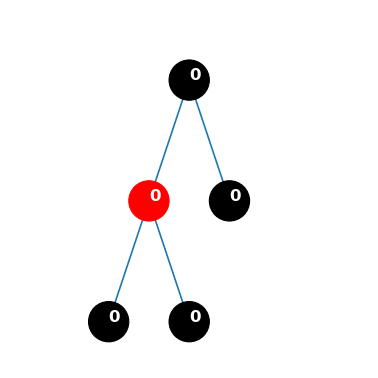

In [69]:
def create_empty_tree():
    global head
    head = Node()
    head.left = Node()
    head.right = Node()
    head.left.left = Node()
    head.left.is_red = True
    head.left.right = Node()
    
create_empty_tree()


FONT_SIZE = 15
head.visualize()